In [1]:
%matplotlib inline
import matplotlib as mlp
mlp.rcParams['figure.figsize'] = 10, 15
from matplotlib.pyplot import imshow

In [2]:
import rawpy
import numpy as np

uint8 (3040, 4056, 3)


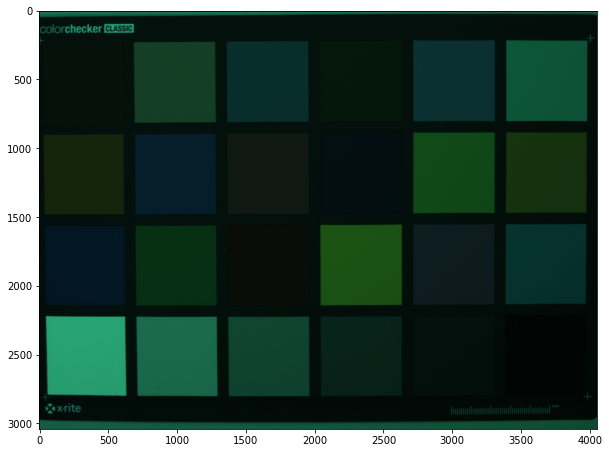

In [3]:
raw = rawpy.imread("./hq_cam_color_checker_new.dng")
array = raw.postprocess(output_color=rawpy.ColorSpace.raw, gamma=(1,1),
                        user_wb=[1.0,1.0,1.0,1.0], no_auto_bright=True)
imshow(array)
print(array.dtype, array.shape)

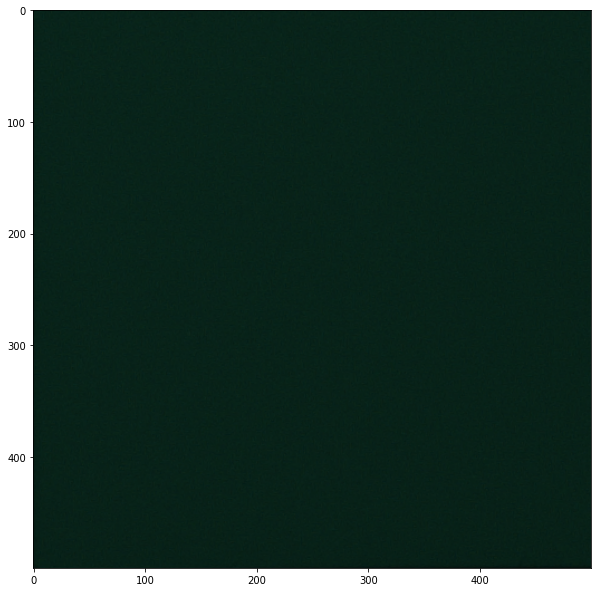

In [4]:
array_crop = array[2300:2800, 2050:2550] # grey field #D4
# field 4 last line [y1:y2,x1:x2] 500x500
imshow(array_crop)

In [5]:
r_median = np.median(array_crop[:,:,0])
g_median = np.median(array_crop[:,:,1])
b_median = np.median(array_crop[:,:,2])
print(r_median, g_median, b_median)

8.0 34.0 25.0


In [6]:
base_wb = [g_median/r_median, 1.0, g_median/b_median, 1.0]
print(base_wb)

[4.25, 1.0, 1.36, 1.0]


In [7]:
base_brightness = 255/g_median
print(base_brightness)

7.5


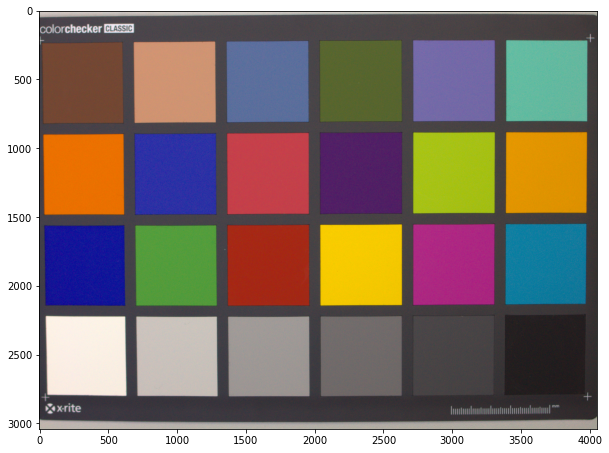

In [8]:
array_corr = raw.postprocess(user_wb=base_wb)
imshow(array_corr)

112.0 106.0 106.0


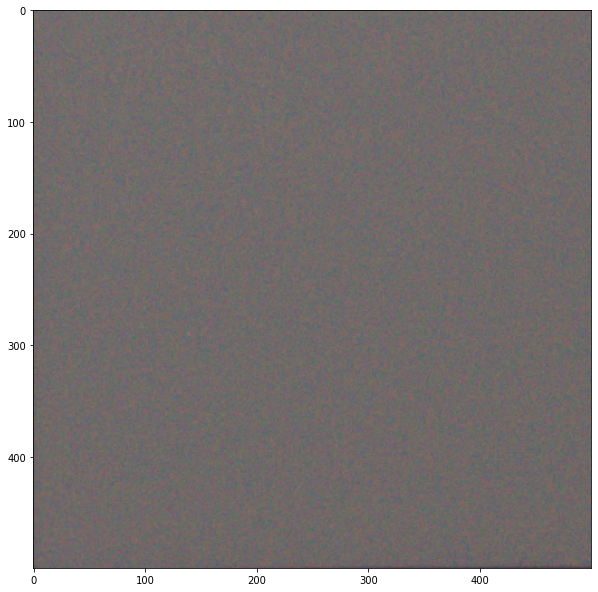

In [9]:
array_crop_corr = array_corr[2300:2800, 2050:2550] # grey field #D4
# field 4 last line [y1:y2,x1:x2] 500x500
imshow(array_crop_corr)

# calculate RGB for on cropped and corrected grey field
r_median_cc = np.median(array_crop_corr[:,:,0])
g_median_cc = np.median(array_crop_corr[:,:,1])
b_median_cc = np.median(array_crop_corr[:,:,2])
print(r_median_cc, g_median_cc, b_median_cc)
# target values [R=122,G=122,B=121]